In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ratings=pd.read_csv('ratings_Electronics.csv')

In [3]:
ratings.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [4]:
ratings.rename(columns={list(ratings)[0]:'userid',list(ratings)[1]:'prodid',list(ratings)[2]:'rating',list(ratings)[3]:'timestamp'},inplace=True)

In [5]:
ratings.head()

,userid,prodid,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [6]:
ratings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,7824481.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824481.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


Dropping Timestamp as it will not have any impact in the predictions

In [7]:
ratings.drop(['timestamp'],axis=1,inplace=True)

In [8]:
ratings.head()

,userid,prodid,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


Checking for presence of any Null values in the data

In [9]:
ratings.isnull().sum()

userid    0
prodid    0
rating    0
dtype: int64

Plotting for Ratings to check its distribution

C:\Users\Manojkumar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


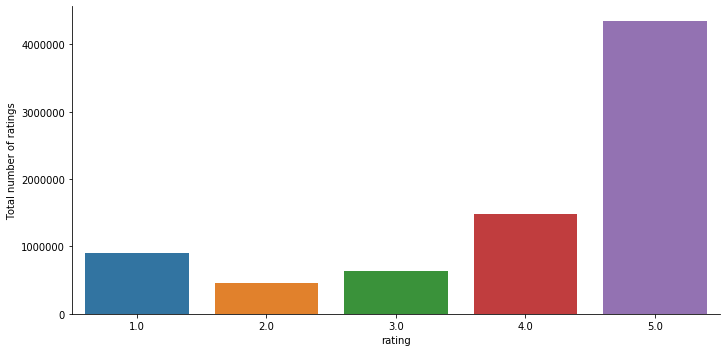

In [10]:
rating_dist = sns.factorplot("rating", data=ratings, aspect=2.0,kind='count')
rating_dist.set_ylabels("Total number of ratings")

The above plot shows that most of the users gave 5 ratings for the products and second highest ratings is 4. This explains the Mean for ratings which is greater than 4.

There are no missing values. So no need to treat the data for missing values

##### Popularity base Recommender 
Segregating data as per user ratings

In [11]:
user_rating=ratings.groupby('userid')['rating'].count().sort_values(ascending=False)

In [12]:
user_rating.head()

userid
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: rating, dtype: int64

Segregating data as per product ratings

In [13]:
product_rating=ratings.groupby('prodid')['rating'].count().sort_values(ascending=False)

In [14]:
product_rating.head()

prodid
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: rating, dtype: int64

In [15]:
popular=pd.DataFrame(ratings.groupby('prodid')['rating'].mean())

In [16]:
#### Adding count as a column to the data frame
popular['rating_count']=pd.DataFrame(ratings.groupby('prodid')['rating'].count())

In [17]:
popular.head()

,rating,rating_count
prodid,,
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27
0558835155,3.000000,1


In [18]:
popular.sort_values(['rating','rating_count'],ascending=False)

,rating,rating_count
prodid,,
B008I64AQ8,5.0,45
B00GQDCMVA,5.0,41
B007WMOCW6,5.0,38
B002T3JN0Y,5.0,36
B00592002W,5.0,36
...,...,...
B00L65M0Y2,1.0,1
B00L7O2AGA,1.0,1
B00L7RNW2S,1.0,1


###### Taking first 10 popular items with highest user rating and also with highest number of  ratings and recommending for the user

In [19]:
popular.sort_values(['rating','rating_count'],ascending=False).head(10)

,rating,rating_count
prodid,,
B008I64AQ8,5.0,45
B00GQDCMVA,5.0,41
B007WMOCW6,5.0,38
B002T3JN0Y,5.0,36
B00592002W,5.0,36
B00DWLPUZY,5.0,34
B00KC7I2GU,5.0,31
B00009R8ZW,5.0,28
B000FIJA6W,5.0,28


###### Due to Memory constraints, selecting first 350000 records from the data. Selecting 450000 also created memory issues

In [20]:
Ratings_reduced = ratings.head(25000)

In [21]:
Ratings_reduced 

,userid,prodid,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0
...,...,...,...
24995,A1QG70RKPI86K1,B00001R3W5,5.0
24996,A3AEDUJ7MXBNEX,B00001R3W5,4.0
24997,AIJ8ZHYZLOUKZ,B00001R3W5,5.0
24998,AX04H2SPKO02S,B00001R3XS,5.0


In [22]:
# Including all libs required for Building Collaborative Filtering model
from surprise.model_selection import train_test_split
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Dataset
from surprise import Reader

In [23]:
reader = Reader(rating_scale=(1, 5))
data=Dataset.load_from_df(Ratings_reduced,reader)

In [24]:
trainset, testset = train_test_split(data,test_size=0.3)

In [25]:
#User-User collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})

In [26]:
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [27]:
test_pred =algo.test(testset)

In [28]:
test_pred

[Prediction(uid='A388MRFILHL3DB', iid='B00000J4FS', r_ui=4.0, est=3.9664, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2HDX9JXPWYX95', iid='B00000DM9W', r_ui=5.0, est=3.9664, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1YOGD8K6EV6VI', iid='B00000J3UJ', r_ui=1.0, est=3.9664, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A17YPB3JICRUK2', iid='B00000J1UY', r_ui=5.0, est=3.9664, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ARR3EHW4MSWJX', iid='B00000J1UQ', r_ui=5.0, est=3.9664, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A38L4SQLHL47K2', iid='9984984362', r_ui=1.0, est=3.9664, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A4SZ62RJ8GRMY', iid='B00000JYJ0', r_ui=1.0, est=3.9664, details={'was_impossible': T

In [29]:
#get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred,verbose=True)

User-based Model : Test Set
RMSE: 1.3919


1.3918504192693077

In [30]:
algo = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True})

In [31]:
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [32]:
test_pred_cosine =algo.test(testset)

In [33]:
test_pred_cosine

[Prediction(uid='A388MRFILHL3DB', iid='B00000J4FS', r_ui=4.0, est=3.9664, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2HDX9JXPWYX95', iid='B00000DM9W', r_ui=5.0, est=3.9664, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1YOGD8K6EV6VI', iid='B00000J3UJ', r_ui=1.0, est=3.9664, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A17YPB3JICRUK2', iid='B00000J1UY', r_ui=5.0, est=3.9664, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ARR3EHW4MSWJX', iid='B00000J1UQ', r_ui=5.0, est=3.9664, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A38L4SQLHL47K2', iid='9984984362', r_ui=1.0, est=3.9664, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A4SZ62RJ8GRMY', iid='B00000JYJ0', r_ui=1.0, est=3.9664, details={'was_impossible': T

In [35]:
#get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_cosine,verbose=True)

User-based Model : Test Set
RMSE: 1.3925


1.3925357523773572

From the above, Both Cosine and Pearson's models gives a very high RMSE. Since the subset taken has considerabaly less volume than the original dataset, the data might not have enough details for the product or the User to predict the details correctly. 

PS: The memory error occured for anything above 25,000 records. 